In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
sys.path.append('../')
import python.edge as edge 
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np

Using TensorFlow backend.


In [3]:
files= '../data/interim/s7_spim3/'

In [4]:
images = [img_to_array(load_img(file, grayscale=True, target_size=(28,28)))
 for file in glob.glob(files+"*.jpg")]

In [5]:
np.shape(images[0])


(28, 28, 1)

In [6]:
input_img = Input(shape=(28, 28, 1))

In [7]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
x_train = np.array(images)
x_test =np.array(images)[275:345]

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

In [10]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=600,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 500 samples, validate on 70 samples
Epoch 1/600
500/500 [==============================] - 2s - loss: 0.6674 - val_loss: 0.5142
Epoch 2/600
500/500 [==============================] - 2s - loss: 0.3556 - val_loss: 0.4377
Epoch 3/600
500/500 [==============================] - 1s - loss: 0.3005 - val_loss: 0.3676
Epoch 4/600
500/500 [==============================] - 2s - loss: 0.2577 - val_loss: 0.3232
Epoch 5/600
500/500 [==============================] - 2s - loss: 0.2319 - val_loss: 0.3066
Epoch 6/600
500/500 [==============================] - 2s - loss: 0.2237 - val_loss: 0.2991
Epoch 7/600
500/500 [==============================] - 1s - loss: 0.2175 - val_loss: 0.2936
Epoch 8/600
500/500 [==============================] - 1s - loss: 0.2187 - val_loss: 0.2897
Epoch 9/600
500/500 [==============================] - 1s - loss: 0.2129 - val_loss: 0.2866
Epoch 10/600
500/500 [==============================] - 1s - loss: 0.2115 - val_loss: 0.2858
Epoch 11/600
500/500 [============

500/500 [==============================] - 1s - loss: 0.1995 - val_loss: 0.2716
Epoch 89/600
500/500 [==============================] - 1s - loss: 0.1999 - val_loss: 0.2719
Epoch 90/600
500/500 [==============================] - 1s - loss: 0.1992 - val_loss: 0.2713
Epoch 91/600
500/500 [==============================] - 1s - loss: 0.1988 - val_loss: 0.2708
Epoch 92/600
500/500 [==============================] - 1s - loss: 0.1988 - val_loss: 0.2715
Epoch 93/600
500/500 [==============================] - 1s - loss: 0.1994 - val_loss: 0.2710
Epoch 94/600
500/500 [==============================] - 1s - loss: 0.1991 - val_loss: 0.2719
Epoch 95/600
500/500 [==============================] - 1s - loss: 0.1993 - val_loss: 0.2716
Epoch 96/600
500/500 [==============================] - 1s - loss: 0.1992 - val_loss: 0.2718
Epoch 97/600
500/500 [==============================] - 1s - loss: 0.1992 - val_loss: 0.2718
Epoch 98/600
500/500 [==============================] - 1s - loss: 0.1993 - val_los

500/500 [==============================] - 1s - loss: 0.1971 - val_loss: 0.2687
Epoch 176/600
500/500 [==============================] - 1s - loss: 0.1973 - val_loss: 0.2692
Epoch 177/600
500/500 [==============================] - 2s - loss: 0.1973 - val_loss: 0.2687
Epoch 178/600
500/500 [==============================] - 2s - loss: 0.1971 - val_loss: 0.2688
Epoch 179/600
500/500 [==============================] - 2s - loss: 0.1973 - val_loss: 0.2688
Epoch 180/600
500/500 [==============================] - 2s - loss: 0.1976 - val_loss: 0.2687
Epoch 181/600
500/500 [==============================] - 2s - loss: 0.1970 - val_loss: 0.2687
Epoch 182/600
500/500 [==============================] - 2s - loss: 0.1970 - val_loss: 0.2689
Epoch 183/600
500/500 [==============================] - 2s - loss: 0.1973 - val_loss: 0.2689
Epoch 184/600
500/500 [==============================] - 2s - loss: 0.1974 - val_loss: 0.2687
Epoch 185/600
500/500 [==============================] - 2s - loss: 0.1970

500/500 [==============================] - 1s - loss: 0.1960 - val_loss: 0.2675
Epoch 263/600
500/500 [==============================] - 2s - loss: 0.1962 - val_loss: 0.2677
Epoch 264/600
500/500 [==============================] - 1s - loss: 0.1962 - val_loss: 0.2680
Epoch 265/600
500/500 [==============================] - 2s - loss: 0.1963 - val_loss: 0.2675
Epoch 266/600
500/500 [==============================] - 2s - loss: 0.1958 - val_loss: 0.2677
Epoch 267/600
500/500 [==============================] - 1s - loss: 0.1961 - val_loss: 0.2678
Epoch 268/600
500/500 [==============================] - 1s - loss: 0.1961 - val_loss: 0.2676
Epoch 269/600
500/500 [==============================] - 2s - loss: 0.1960 - val_loss: 0.2677
Epoch 270/600
500/500 [==============================] - 2s - loss: 0.1958 - val_loss: 0.2676
Epoch 271/600
500/500 [==============================] - 2s - loss: 0.1959 - val_loss: 0.2676
Epoch 272/600
500/500 [==============================] - 2s - loss: 0.1962

500/500 [==============================] - 2s - loss: 0.1956 - val_loss: 0.2672
Epoch 350/600
500/500 [==============================] - 2s - loss: 0.1953 - val_loss: 0.2672
Epoch 351/600
500/500 [==============================] - 2s - loss: 0.1954 - val_loss: 0.2674
Epoch 352/600
500/500 [==============================] - 3s - loss: 0.1954 - val_loss: 0.2669
Epoch 353/600
500/500 [==============================] - 3s - loss: 0.1952 - val_loss: 0.2671
Epoch 354/600
500/500 [==============================] - 1s - loss: 0.1954 - val_loss: 0.2669
Epoch 355/600
500/500 [==============================] - 1s - loss: 0.1954 - val_loss: 0.2670
Epoch 356/600
500/500 [==============================] - 2s - loss: 0.1953 - val_loss: 0.2669
Epoch 357/600
500/500 [==============================] - 2s - loss: 0.1951 - val_loss: 0.2668
Epoch 358/600
500/500 [==============================] - 1s - loss: 0.1952 - val_loss: 0.2671
Epoch 359/600
500/500 [==============================] - 1s - loss: 0.1952

500/500 [==============================] - 2s - loss: 0.1948 - val_loss: 0.2666
Epoch 437/600
500/500 [==============================] - 2s - loss: 0.1949 - val_loss: 0.2665
Epoch 438/600
500/500 [==============================] - 2s - loss: 0.1946 - val_loss: 0.2664
Epoch 439/600
500/500 [==============================] - 1s - loss: 0.1946 - val_loss: 0.2666
Epoch 440/600
500/500 [==============================] - 1s - loss: 0.1949 - val_loss: 0.2666
Epoch 441/600
500/500 [==============================] - 2s - loss: 0.1945 - val_loss: 0.2663
Epoch 442/600
500/500 [==============================] - 2s - loss: 0.1944 - val_loss: 0.2664
Epoch 443/600
500/500 [==============================] - 2s - loss: 0.1947 - val_loss: 0.2664
Epoch 444/600
500/500 [==============================] - 2s - loss: 0.1947 - val_loss: 0.2664
Epoch 445/600
500/500 [==============================] - 1s - loss: 0.1947 - val_loss: 0.2667
Epoch 446/600
500/500 [==============================] - 1s - loss: 0.1947

500/500 [==============================] - 1s - loss: 0.1944 - val_loss: 0.2662
Epoch 524/600
500/500 [==============================] - 1s - loss: 0.1943 - val_loss: 0.2661
Epoch 525/600
500/500 [==============================] - 1s - loss: 0.1941 - val_loss: 0.2663
Epoch 526/600
500/500 [==============================] - 1s - loss: 0.1943 - val_loss: 0.2663
Epoch 527/600
500/500 [==============================] - 1s - loss: 0.1945 - val_loss: 0.2662
Epoch 528/600
500/500 [==============================] - 2s - loss: 0.1943 - val_loss: 0.2661
Epoch 529/600
500/500 [==============================] - 2s - loss: 0.1941 - val_loss: 0.2662
Epoch 530/600
500/500 [==============================] - 2s - loss: 0.1943 - val_loss: 0.2662
Epoch 531/600
500/500 [==============================] - 1s - loss: 0.1943 - val_loss: 0.2661
Epoch 532/600
500/500 [==============================] - 1s - loss: 0.1939 - val_loss: 0.2660
Epoch 533/600
500/500 [==============================] - 1s - loss: 0.1941

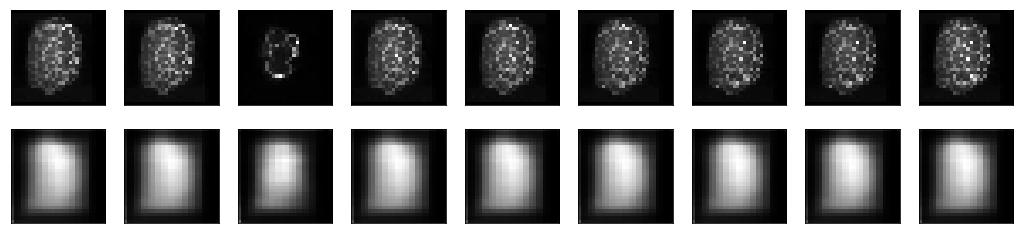

In [10]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in [1,2,3,4,5,6,7,8,9]:
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()